# [Genetic Programming as a Means for Programming Computers by Natural Selection](https://link.springer.com/article/10.1007/BF00175355)
## by John R. Koza

## Presented by Apurva, Bhargav and Naveed

In [1]:
import numpy as np
import pandas as pd
import io

import gplearn
from gplearn.genetic import SymbolicRegressor

import pydotplus
from IPython.display import Image

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

## Importing Data Files

The four time series are imported below. The reporting frequency in each series is Quarterly.

In [2]:
'''
GNP Deflator (the regression output), normalized to 1.0 for 1982
Obtained from https://fred.stlouisfed.org/series/GNPDEF
'''
# df_GNPDEF = pd.read_csv(io.BytesIO(uploaded['GNPDEF.csv']), parse_dates=['DATE'], index_col=['DATE'])
df_GNPDEF = pd.read_csv('GNPDEF.csv', parse_dates=['DATE'], index_col=['DATE'])

df_GNPDEF.columns = ['VAL']
df_GNPDEF.VAL = df_GNPDEF.VAL/100

In [3]:
display(df_GNPDEF.dtypes)
display(df_GNPDEF.head())

VAL    float64
dtype: object

,VAL
DATE,
1959-01-01,0.338958
1959-04-01,0.339498
1959-07-01,0.340807
1959-10-01,0.342137
1960-01-01,0.343529


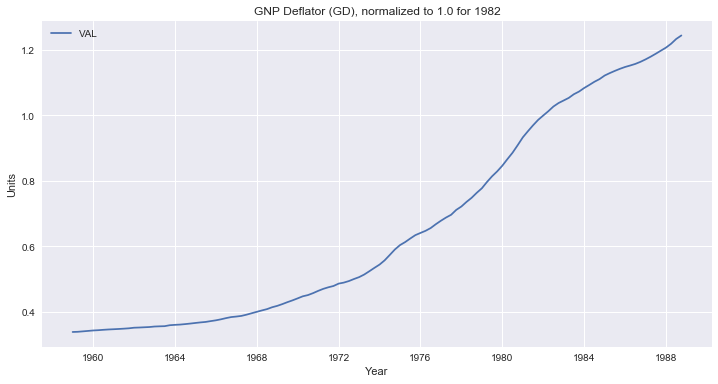

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df_GNPDEF.index, df_GNPDEF.VAL)
plt.title('GNP Deflator (GD), normalized to 1.0 for 1982')
plt.xlabel('Year')
plt.ylabel('Units')
plt.legend(loc = 'upper left')
plt.show()

In [5]:
'''
Quarterly Gross National Product (GNP), in billions of 1982 dollars.
Obtained from https://fred.stlouisfed.org/series/GNPC96
'''
# df_GNP = pd.read_csv(io.BytesIO(uploaded['GNP.csv']), parse_dates=['DATE'], index_col=['DATE'])
df_GNP = pd.read_csv('GNP.csv', parse_dates=['DATE'], index_col=['DATE'])

df_GNP.columns = ['VAL']

In [6]:
display(df_GNP.dtypes)
display(df_GNP.head())

VAL    float64
dtype: object

,VAL
DATE,
1959-01-01,45.71211
1959-04-01,46.73765
1959-07-01,46.79040
1959-10-01,46.94016
1960-01-01,47.97725


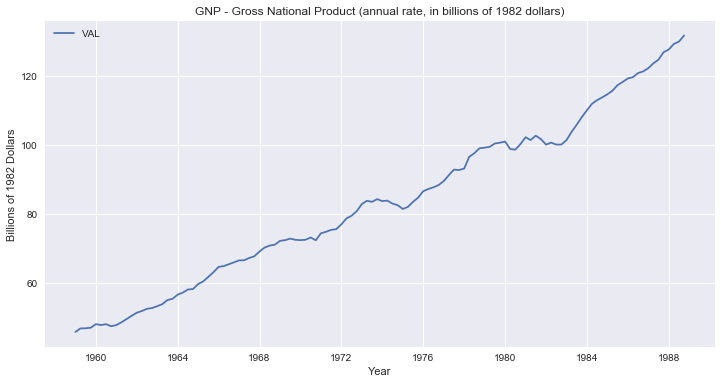

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_GNP.index, df_GNP.VAL)
plt.title('GNP - Gross National Product (annual rate, in billions of 1982 dollars)')
plt.xlabel('Year')
plt.ylabel('Billions of 1982 Dollars')
plt.legend(loc = 'upper left')
plt.show()

In [8]:
'''
Quarterly Money Stock M2. In billions of 1982 dollars.
Obtained from https://fred.stlouisfed.org/series/MABMM201USQ189S
'''

# df_M2 = pd.read_csv(io.BytesIO(uploaded['M2.csv']), parse_dates=['DATE'], index_col=['DATE'])
df_M2 = pd.read_csv('M2.csv', parse_dates=['DATE'], index_col=['DATE'])

df_M2.columns = ['VAL']

In [9]:
display(df_M2.dtypes)
display(df_M2.head())

VAL    float64
dtype: object

,VAL
DATE,
1959-01-01,16.19650
1959-04-01,16.43846
1959-07-01,16.66166
1959-10-01,16.71981
1960-01-01,16.80797


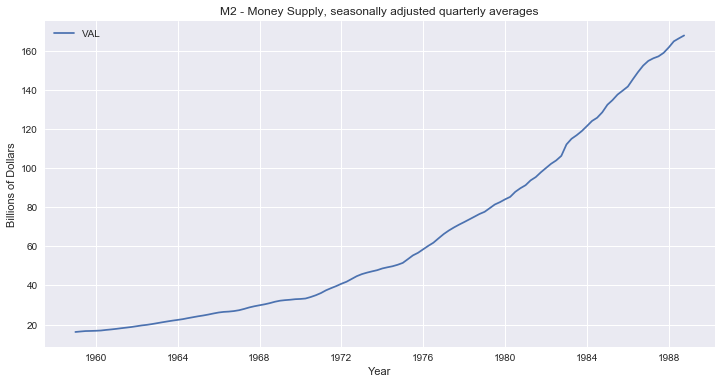

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_M2.index, df_M2.VAL)
plt.title('M2 - Money Supply, seasonally adjusted quarterly averages')
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
'''
Quarterly Yield (rate) for 3-Month US Treasury bills/bonds.
Obtained from https://fred.stlouisfed.org/series/TB3MS.
'''

# df_IR = pd.read_csv(io.BytesIO(uploaded['3MTBill.csv']), parse_dates=['DATE'], index_col=['DATE'])
df_IR = pd.read_csv('3MTBill.csv', parse_dates=['DATE'], index_col=['DATE'])

df_IR.columns = ['VAL']

In [12]:
display(df_IR.dtypes)
display(df_IR.head())

VAL    float64
dtype: object

,VAL
DATE,
1959-01-01,2.773333
1959-04-01,3.000000
1959-07-01,3.540000
1959-10-01,4.230000
1960-01-01,3.873333


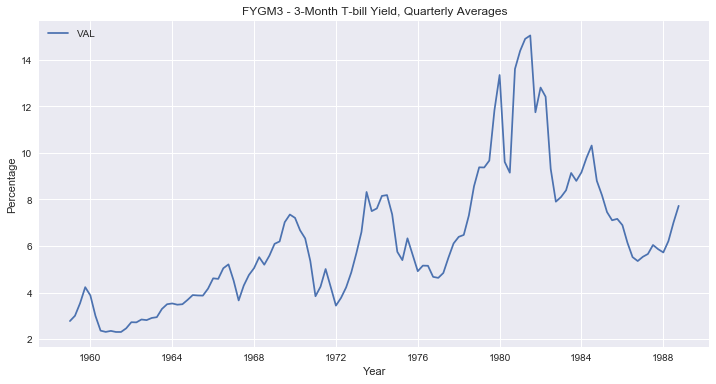

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_IR.index, df_IR.VAL)
plt.title('FYGM3 - 3-Month T-bill Yield, Quarterly Averages')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc = 'upper left')
plt.show()

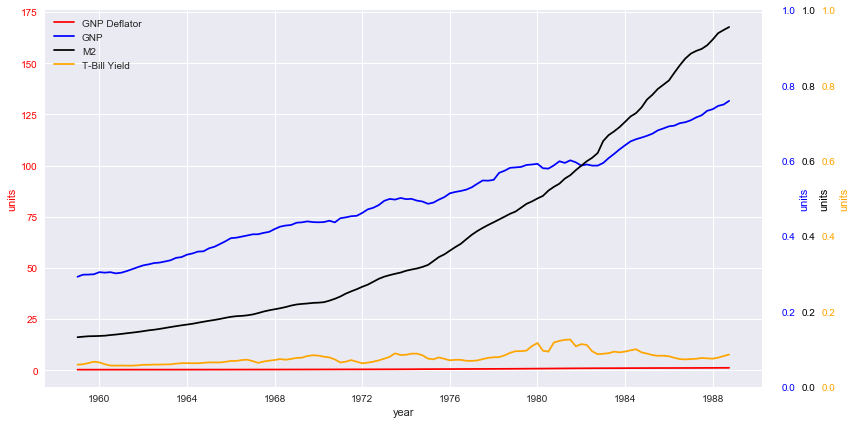

In [14]:
fig, ax1 = plt.subplots(figsize = (12, 6))

color = 'red'
ax1.set_xlabel('year')
ax1.set_ylabel('units', color=color)
line1, = ax1.plot(df_GNPDEF.index, df_GNPDEF.VAL, color=color, label = 'GNP Deflator')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('units', color=color)  # we already handled the x-label with ax1
line2, = ax1.plot(df_GNPDEF.index, df_GNP.VAL, color=color, label = 'GNP')
ax2.tick_params(axis='y', labelcolor=color, pad = 20)
ax2.grid(None)


ax3 = ax1.twinx()
color = 'black'
ax3.set_ylabel('units', color=color)  # we already handled the x-label with ax1
line3, = ax1.plot(df_GNPDEF.index, df_M2.VAL, color=color, label = 'M2')
ax3.tick_params(axis='y', labelcolor=color, pad = 40)
ax3.grid(None)

ax4 = ax1.twinx()
color = 'orange'
ax4.set_ylabel('units', color=color)  # we already handled the x-label with ax1
line4, = ax1.plot(df_GNPDEF.index, df_IR.VAL, color=color, label = 'T-bill Yield')
ax4.tick_params(axis='y', labelcolor=color, pad = 60)
ax4.grid(None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.legend(handles = [line1, line2, line3, line4], labels = ['GNP Deflator', 'GNP', 'M2', 'T-Bill Yield'], loc = 'upper left')
plt.show()


## Modeling

In [15]:
# The output/dependent variable and the three independent variables are combined into y and X respectively.
X = np.array([df['VAL'] for df in [df_GNP, df_M2, df_IR]]).T
y = df_GNPDEF.VAL.values

print(X.shape, y.shape)
display(X[:5, :])
display(y[:5])

(120, 3) (120,)


array([[45.71211   , 16.1965    ,  2.77333333],
       [46.73765   , 16.43846   ,  3.        ],
       [46.7904    , 16.66166   ,  3.54      ],
       [46.94016   , 16.71981   ,  4.23      ],
       [47.97725   , 16.80797   ,  3.87333333]])

array([0.3389577, 0.339498 , 0.3408071, 0.342137 , 0.3435292])

In [16]:
split_index = 80 # as suggested by Koza in the paper

# Training samples (first 20 years of data, 80 samples)
X_train = X[:split_index, :]
y_train = y[:split_index]

# Testing samples (last 10 years of data, 40 samples)
X_test = X[split_index:, :]
y_test = y[split_index:]

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    17.95 2.823065034844277e+60       13 2.0987012399535363 2.0987012399535363      0.00s


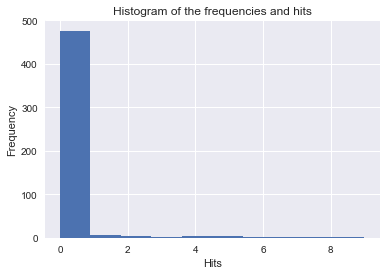

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div', 'log', <gplearn.functions._Function object at 0x0000027271C58B00>),
         generations=1, init_depth=(2, 6), init_method='half and half',
         introspecting_function=<function introspect at 0x0000027271C47598>,
         max_samples=0.8,
         metric=<gplearn.fitness._Fitness object at 0x0000027271C58C18>,
         n_jobs=-1, p_crossover=0.9, p_hoist_mutation=0.01,
         p_point_mutation=0.01, p_point_replace=0.05,
         p_subtree_mutation=0.01, parsimony_coefficient=0.001,
         population_size=500, random_state=0, stopping_criteria=0.01,
         tournament_size=20, verbose=1, warm_start=False)

add(sub(log(log(X0)), sub(add(0.823, X0), div(-0.280, X1))), X0)


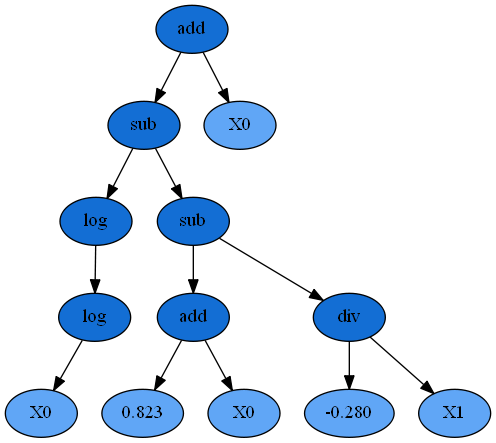

In [23]:
'''
GPLearn does not have an exponential function by default, I implemented a clipped version
(as suggested by Koza in the paper) myself which I use in the set of functions passed to the regressror.
'''
def introspect(population):
    '''
    This function can access the population of each generation and is called after the calculation of every generation.
    The population array contains programs that have the following properties.
    raw_fitness_ : The raw fitness of the individual program.
    fitness_ : The penalized fitness of the individual program.
    oob_fitness_ : The out-of-bag raw fitness of the individual program for the held-out samples. Only present when sub-sampling was used in the estimator by specifying max_samples < 1.0.
    depth_ : The maximum depth of the program tree.
    length_ : The number of functions and terminals in the program.
    '''
    population_length = len(population)
    sample_length = split_index
    hit_value = 0.05
    prog_hits = np.zeros([population_length,sample_length])
    
    for i in range(population_length):
        program = population[i]
        y_pred = program.y_predicted
        y = program.y_target
        mse = np.square(y-y_pred)
        err = y-y_pred
        errN = np.absolute(err) / y
        for j in range(sample_length):
            is_hit = errN[j] <= hit_value
            prog_hits[i][j] =  1 if is_hit else 0
    hit_count = np.array([np.count_nonzero(prog) for prog in prog_hits])
#     display(hit_count)
    plt.hist(hit_count, bins='auto')  # arguments are passed to np.histogram
    plt.title("Histogram of the frequencies and hits")
    plt.xlabel('Hits')
    plt.ylabel('Frequency')
    plt.show()

def clipped_exp(x):
  to_return = []
  for i in x:
    if i>=0:
      if i>=23.02585:
        to_return.append(10**10)
      else:
        to_return.append(np.exp(i))
    else:
      if i<=(-23.02585):
        to_return.append(10**(-10))
      else:
        to_return.append(np.exp(i))
  return np.array(to_return)
exp = gplearn.functions.make_function(clipped_exp, name='exp', arity=1)

'''
Koza used sum of squared differences as a fitness measure. I implemented it here.
'''
def ss(y, y_pred, sample_weights):
  return np.sum(np.square(y-y_pred))
sum_squared_errors = gplearn.fitness.make_fitness(ss, greater_is_better=False)


''' The symbolic regression model based on tree-based genetic programming. 
Note the key parameters including max_samples, parsimony co-efficient and the most important one, the random_state.

'''

# Here I show the result of only one generation of the iteration (for comparative purposes)

fitness_history = []

est_gp = SymbolicRegressor(population_size=500, metric=sum_squared_errors,
                           generations=1, stopping_criteria=0.01,
                           verbose=1, init_method = 'half and half', function_set= ('add', 'sub', 'mul', 'div', 'log', exp),
                           parsimony_coefficient=0.001, random_state=0, n_jobs=-1, max_samples = 0.80, 
                           introspecting_function = introspect)
display(est_gp.fit(X_train, y_train))
fitness_history.append(est_gp._program.raw_fitness_)

print(est_gp._program)
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   1    14.33 4.5325186042974983e+21        3 0.16837694800070338 0.16837694800070338     16.24s


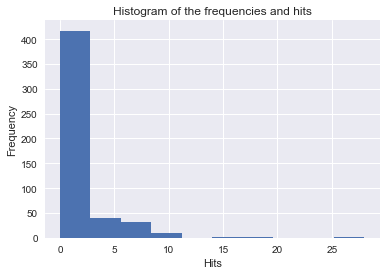

   2    14.83 1.848706739174952e+24        3 0.16837694800070338 0.16837694800070338     29.55s


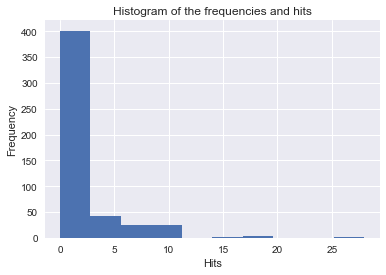

   3    14.89 9.862264388080827e+21        7 0.14225230703381012 0.14225230703381012     38.21s


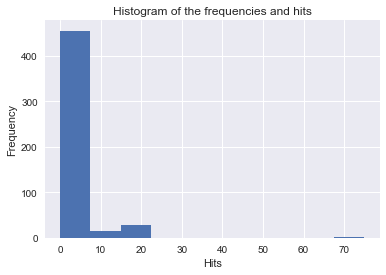

   4     7.86 6.33908864724493e+20       10 0.12712744177645102 0.12712744177645102     43.60s


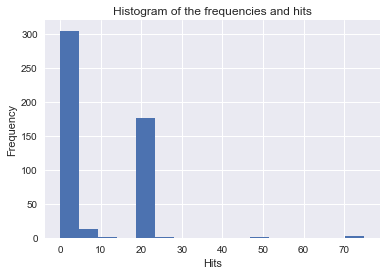

   5     4.37 311434.3981077522        7 0.11880605496179432 0.11880605496179432     41.93s


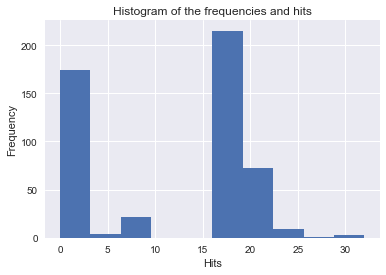

   6     7.25 2691255510242.9155       11 0.09142548554353196 0.09142548554353196     37.62s


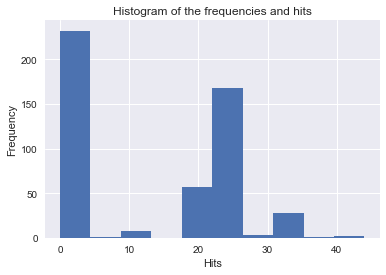

   7     7.76 277576.47867566464       13 0.07730944980147333 0.07730944980147333     34.20s


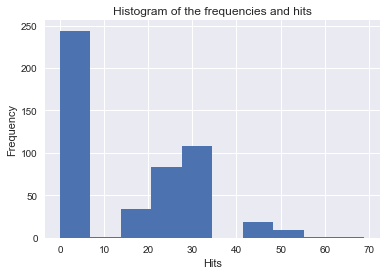

   8     10.6 181588.28032585763       17 0.06277259561769005 0.06277259561769005     30.80s


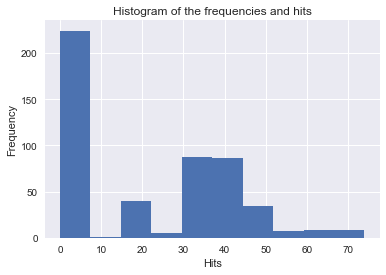

   9     12.5 17860323.009619445       19 0.0602453968164194 0.0602453968164194     28.01s


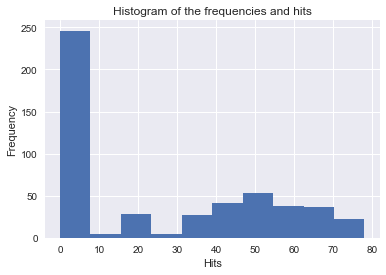

  10    15.54 134587.706484559       29 0.060145433691614875 0.060145433691614875     24.98s


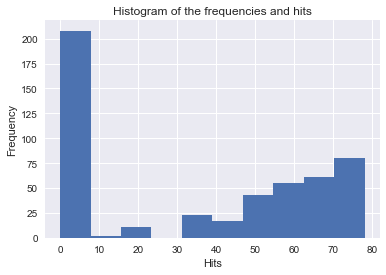

  11    14.66 1.7327163825975822e+23       27 0.060162358244940164 0.060162358244940164     22.10s


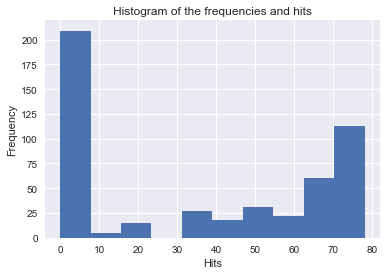

  12     13.9 196388.53527306134       13 0.06152624208228322 0.06152624208228322     19.08s


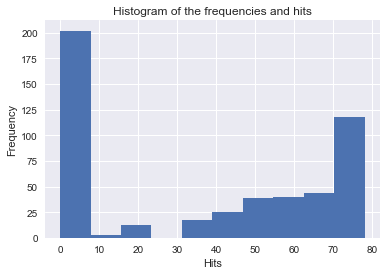

  13    13.65 158730.9317563759       13 0.06152624208228322 0.06152624208228322     15.97s


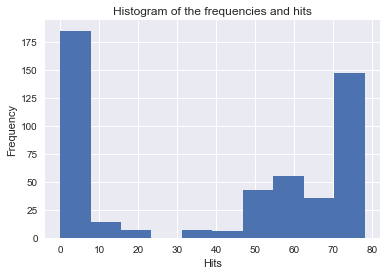

  14    13.62 175392.01953911904       15 0.06148980648059859 0.06148980648059859     12.82s


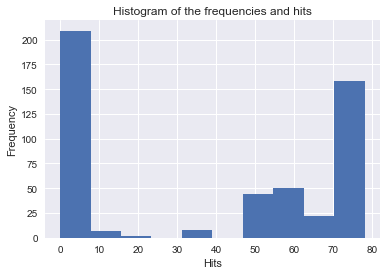

  15    12.99 171654.38014527407       11 0.06143024629715982 0.06143024629715982      9.65s


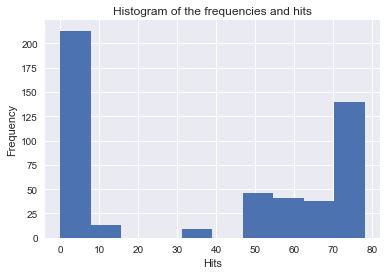

  16    12.43 161662.21265446194       11 0.06143024629715982 0.06143024629715982      6.45s


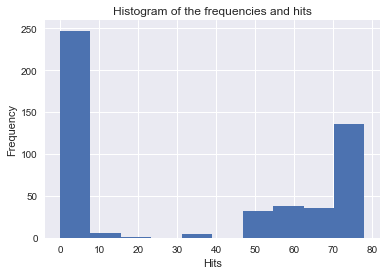

  17     11.6 156566.1827064025       11 0.06143024629715982 0.06143024629715982      3.23s


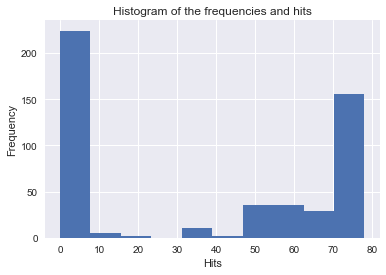

  18    11.33 184287.6811519731       11 0.06143024629715982 0.06143024629715982      0.00s


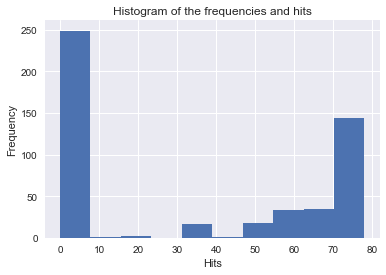

div(X1, add(0.990, add(0.990, add(0.990, add(0.990, X0)))))


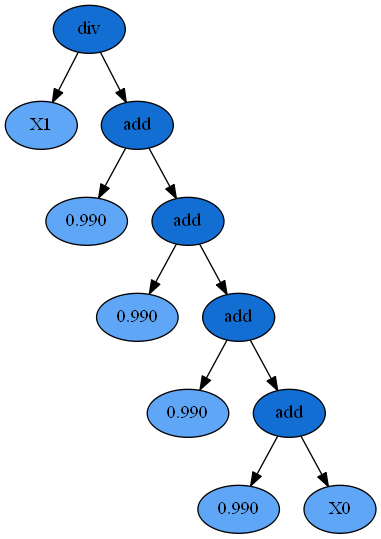

In [24]:
# the rest of the generations, and the final result, are given below

est_gp.set_params(generations=19, warm_start=True)
est_gp.fit(X, y)
fitness_history.append(est_gp._program.raw_fitness_)
print(est_gp._program)
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())


In [30]:
# R^2 values for both the training and the test set are given below.

print(est_gp.score(X_train, y_train))
print(est_gp.score(X_test, y_test))

0.9891641668144544
0.9295859013899936


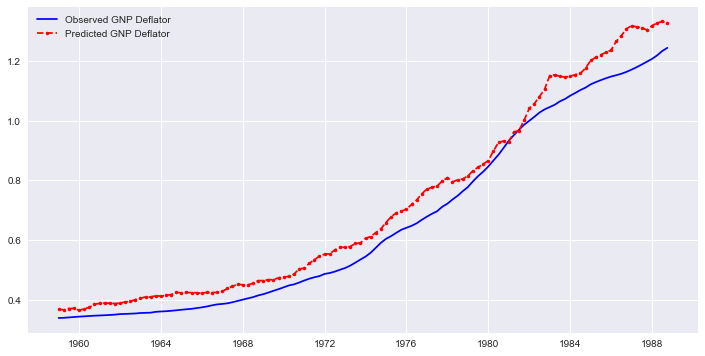

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df_GNPDEF.index, df_GNPDEF.VAL, 'b-', label = 'Observed GNP Deflator')
plt.plot(df_GNPDEF.index, df_M2.VAL/(df_GNP.VAL*(0.99**4)), 'r--', label = 'Predicted GNP Deflator', marker = '.')
plt.legend()


## Some useful links
https://pdfs.semanticscholar.org/e694/0b0c74eefbb1bbb4f5010ab81d0ba864cfba.pdf (the paper Koza cites in Symbolic Regression section)
https://www.jstor.org/stable/pdf/1391966.pdf (the paper cited in the paper above)